In [248]:
import pandas as pd

In [249]:
df = pd.read_csv('titanic.csv', delimiter=',')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Embarked  891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [251]:
df.head()

,Sex,Embarked,Age,Pclass,SibSp,Parch,Fare,Survived
0,male,S,22.0,3,1,0,7.2500,0
1,female,C,38.0,1,1,0,71.2833,1
2,female,S,26.0,3,0,0,7925.0000,1
3,female,S,35.0,1,1,0,53.1000,1
4,male,S,35.0,3,0,0,8.0500,0


In [252]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [253]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [254]:
df.isna().sum()

Sex           0
Embarked      0
Age         177
Pclass        0
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [255]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)

Age         19.86532
Sex          0.00000
Embarked     0.00000
Pclass       0.00000
SibSp        0.00000
Parch        0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [256]:
df.describe()

,Age,Pclass,SibSp,Parch,Fare,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,2.308642,0.523008,0.381594,4026.270117,0.383838
std,14.526497,0.836071,1.102743,0.806057,22153.876204,0.486592
min,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,2.000000,0.000000,0.000000,8.050000,0.000000
50%,28.000000,3.000000,0.000000,0.000000,19.500000,0.000000
75%,38.000000,3.000000,1.000000,0.000000,56.929200,1.000000
max,80.000000,3.000000,8.000000,6.000000,262375.000000,1.000000


In [257]:
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [258]:
def find_best_k(df, col, plot=False):
    k_values = range(1, 21)
    errors = []

    non_missing_data = df[col].dropna().values.reshape(-1, 1)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    for k in k_values:
        fold_errors = []

        for train_index, test_index in kf.split(non_missing_data):
            col_train, col_test = non_missing_data[train_index], non_missing_data[test_index]

            imputer = KNNImputer(n_neighbors=k)
            imputer.fit(col_train)
            col_test_imputed = imputer.transform(col_test)

            error = mean_squared_error(col_test, col_test_imputed)
            fold_errors.append(error)

        avg_error = np.mean(fold_errors)
        errors.append(avg_error)

    best_k = k_values[np.argmin(errors)]

    if plot:
        plt.plot(k_values, errors, marker='o')
        plt.xlabel('Número de Vizinhos (k)')
        plt.ylabel('Erro Quadrático Médio (MSE)')
        plt.title('Escolha do Melhor k')
        plt.show()

    return best_k

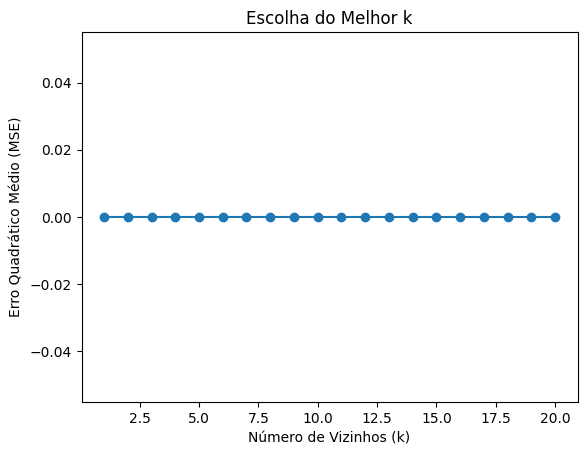

In [259]:
best_k = find_best_k(df, 'Age', True)

In [260]:
f'Best K: {best_k}'

'Best K: 1'

In [261]:
imputer = KNNImputer(n_neighbors=best_k)
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1, 1))

In [262]:
df.isna().sum()

Sex         0
Embarked    0
Age         0
Pclass      0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [263]:
df.head()

,Sex,Embarked,Age,Pclass,SibSp,Parch,Fare,Survived
0,male,S,22.0,3,1,0,7.2500,0
1,female,C,38.0,1,1,0,71.2833,1
2,female,S,26.0,3,0,0,7925.0000,1
3,female,S,35.0,1,1,0,53.1000,1
4,male,S,35.0,3,0,0,8.0500,0


In [264]:
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')

In [265]:
sex_dummies = sex_dummies.astype(int)

In [266]:
df = pd.concat([df, sex_dummies], axis=1)

In [267]:
df.drop('Sex', axis=1, inplace=True)

In [268]:
df.head()

,Embarked,Age,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male
0,S,22.0,3,1,0,7.2500,0,0,1
1,C,38.0,1,1,0,71.2833,1,1,0
2,S,26.0,3,0,0,7925.0000,1,1,0
3,S,35.0,1,1,0,53.1000,1,1,0
4,S,35.0,3,0,0,8.0500,0,0,1


In [269]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [270]:
embarked_dummies = embarked_dummies.astype(int)

In [271]:
df = pd.concat([df, embarked_dummies], axis=1)

In [272]:
df.drop('Embarked', axis=1, inplace=True)

In [273]:
df.head()

,Age,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,1,0,7.2500,0,0,1,0,0,1
1,38.0,1,1,0,71.2833,1,1,0,1,0,0
2,26.0,3,0,0,7925.0000,1,1,0,0,0,1
3,35.0,1,1,0,53.1000,1,1,0,0,0,1
4,35.0,3,0,0,8.0500,0,0,1,0,0,1


In [274]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [275]:
X.head()

,Age,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,1,0,7.2500,0,1,0,0,1
1,38.0,1,1,0,71.2833,1,0,1,0,0
2,26.0,3,0,0,7925.0000,1,0,0,0,1
3,35.0,1,1,0,53.1000,1,0,0,0,1
4,35.0,3,0,0,8.0500,0,1,0,0,1


In [276]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
from sklearn.svm import SVC

In [279]:
classifier = SVC(kernel = 'linear')

In [280]:
# classifier = SVC(kernel = 'poly', degree = 3)

In [281]:
# classifier = SVC(kernel = 'rbf')

In [282]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [283]:
y_pred = classifier.predict(X_test)

In [284]:
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [285]:
from sklearn.metrics import accuracy_score

In [286]:
accuracy_score(y_test, y_pred)

0.7821229050279329

In [287]:
from sklearn.metrics import confusion_matrix

In [288]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [289]:
import seaborn as sns

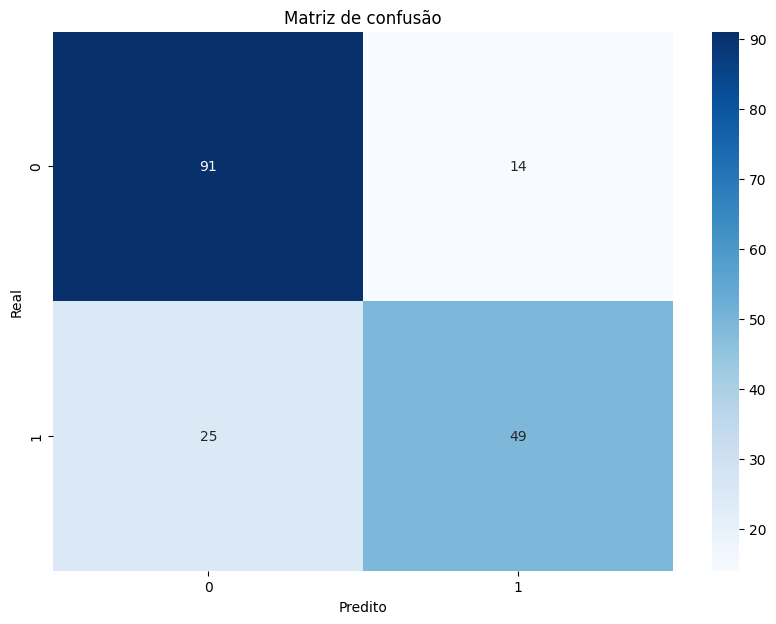

In [290]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

In [291]:
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / np.sum(confusion_matrix)

In [292]:
f'Acuracia: {accuracy}'

'Acuracia: 0.7821229050279329'